In [1]:
#Important packages

import pandas as pd
import numpy as np
import heapq

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\ui.csv")

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [6]:
import heapq
# Define a simple A* search function

def a_star_workout_recommendation(start_workout, experience_level, max_depth=3):
    # A heuristic function to estimate cost (calories burned in this case)
    def heuristic(workout):
        # Here, we assume a simple heuristic that assigns calories burned as the 'cost'
        avg_calories = df[df['Workout_Type'] == workout]['Calories_Burned'].mean()
        return -avg_calories  # We want to maximize calories burned, hence the negative

    # A simple structure where each workout type is linked to another based on experience
    workout_graph = {
        0: [1, 2],  # Strength leads to Cardio or HIIT for higher experience
        1: [0, 3],  # Cardio could lead to Strength or Yoga
        2: [1, 3],  # HIIT leads to Cardio or Yoga
        3: [0, 1]   # Yoga can lead to Strength or Cardio
    }

    # Priority queue for A* (min-heap), starts with the initial workout
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start_workout), 0, start_workout))  # (f_cost, g_cost, current_workout)
    
    # To track the best path
    came_from = {}
    g_costs = {start_workout: 0}
    
    while open_list:
        _, g_cost, current_workout = heapq.heappop(open_list)
        
        # If we reached the max depth, stop the search
        if g_cost > max_depth:
            break

        # Explore the neighbors (next workouts based on experience level)
        next_workouts = workout_graph.get(current_workout, [])
        
        for next_workout in next_workouts:
            tentative_g_cost = g_cost + 1  # Cost of moving to the next workout

            if next_workout not in g_costs or tentative_g_cost < g_costs[next_workout]:
                came_from[next_workout] = current_workout
                g_costs[next_workout] = tentative_g_cost
                f_cost = tentative_g_cost + heuristic(next_workout)
                heapq.heappush(open_list, (f_cost, tentative_g_cost, next_workout))

    # Reconstruct the optimal path
    optimal_path = []
    current = next_workout
    while current in came_from:
        optimal_path.append(current)
        current = came_from[current]
    optimal_path.append(start_workout)
    optimal_path.reverse()

    return optimal_path

# Example usage: A* to find optimal workouts for a user starting with Strength (0) and experience level 2 (Advanced)
start_workout = 0  # Strength
experience_level = 2  # Advanced
optimal_workouts = a_star_workout_recommendation(start_workout, experience_level)
print(optimal_workouts)



[0, 1]


In [7]:
# Encode 'Gender'
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

#Encode 'Workout_Type'
df['Workout_Type'] = df['Workout_Type'].map({'Strength': 0, 'Cardio': 1, 'HIIT': 2, 'Yoga': 3})


# Fix non-numeric 'Max_BPM' and convert it to float
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce')
df['Max_BPM'] = df['Max_BPM'].fillna(df['Max_BPM'].mean())

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge, Lasso

# Prepare features (X) and labels (y)
X = df.drop(columns=[col for col in df.columns if "Calories_Burned" in col])
y = df[[col for col in df.columns if "Calories_Burned" in col]].squeeze()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model = Ridge(alpha=1.0) # or Lasso(alpha=0.1) Ridge(alpha=1.0)
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 30.82523918480538
Mean Squared Error (MSE): 1616.449677834424
Root Mean Squared Error (RMSE): 40.20509517255772
R-squared (R2): 0.9796841336040875


In [21]:
# Function to combine A* workout recommendations with calorie predictions
def recommend_workout_and_calories(start_workout, experience_level):
    # Step 1: Use A* to find optimal workouts
    optimal_workouts = a_star_workout_recommendation(start_workout, experience_level)

    # Step 2: Predict calories burned for each optimal workout
    calorie_predictions = []
    for workout in optimal_workouts:
        workout_data = df[df['Workout_Type'] == workout]
        if workout_data.empty:
            continue
        
        # Get the average feature set for this workout type
        avg_features = workout_data.mean().drop("Calories_Burned")
        avg_features = avg_features.values.reshape(1, -1)
        
        # Predict calories burned
        predicted_calories = model.predict(avg_features)
        calorie_predictions.append((workout, predicted_calories[0]))

    return calorie_predictions

# Example usage:
start_workout = 0  # Strength
experience_level = 2  # Advanced
recommendations = recommend_workout_and_calories(start_workout, experience_level)
print(recommendations)


[(0, 912.2596959111669), (2, 922.6604217164125), (3, 904.2766863682372)]


C:\ana\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\ana\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\ana\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


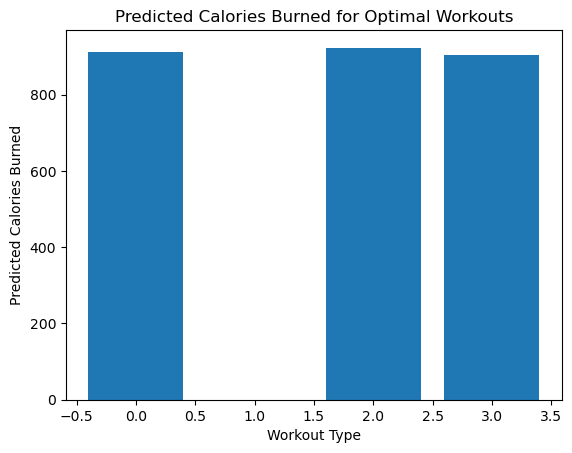

In [22]:
import matplotlib.pyplot as plt

# Visualization of optimal workout path and predicted calories burned
workouts, calories = zip(*recommendations)

plt.bar(workouts, calories)
plt.xlabel('Workout Type')
plt.ylabel('Predicted Calories Burned')
plt.title('Predicted Calories Burned for Optimal Workouts')
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


#  Prepare features and labels
X = df.drop(columns=[col for col in df.columns if "Calories_Burned" in col])
y = df[[col for col in df.columns if "Calories_Burned" in col]]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

# Make predictions and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 36.20513698630137
